In [131]:
# Hacky way to import from parent directory
# https://www.reddit.com/r/learnpython/comments/x6nibz/comment/in7rxzu/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button
import sys
sys.path.append('..')

In [143]:
from ebirdtools import EBirdTools
# data_sj = EBirdTools.load_data('../data/ebd_2025-08-20-20-26-00_37.33_-121.86_30_50.csv')
# data_eg = EBirdTools.load_data('../data/ebd_2025-08-20-20-31-45_25.75_-80.56_30_50.csv')
data_ch = EBirdTools.load_data('../data/ebd_2025-08-20-20-35-54_41.88_-87.63_30_50.csv')
# data_la = EBirdTools.load_data('../data/ebd_2025-08-20-20-40-54_34.05_-118.24_30_50.csv')
# data_se = EBirdTools.load_data('../data/ebd_2025-08-20-20-44-54_47.61_-122.33_30_50.csv')

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import plotly.express as px

In [119]:
def helper(df, labels, plot=True):
    df_aug = df.copy()
    df_aug['cluster'] = pd.Series(labels, index=df.index)
    if plot:
        fig = px.scatter_mapbox(X_aug, lat='lat', lon='lng', color='cluster', hover_name='comName')
        fig.update_mapboxes(style='open-street-map')
        fig.show()
    return df_aug

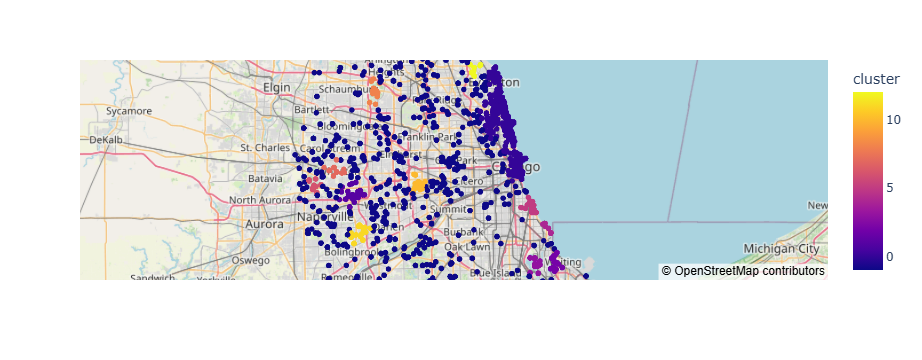

In [155]:
X = data_ch
X = X.sample(n=min(len(X)//10, 10000))
clustering = DBSCAN(eps=0.02, min_samples=100).fit(X[['lat', 'lng']])

X_aug = helper(X, clustering.labels_)

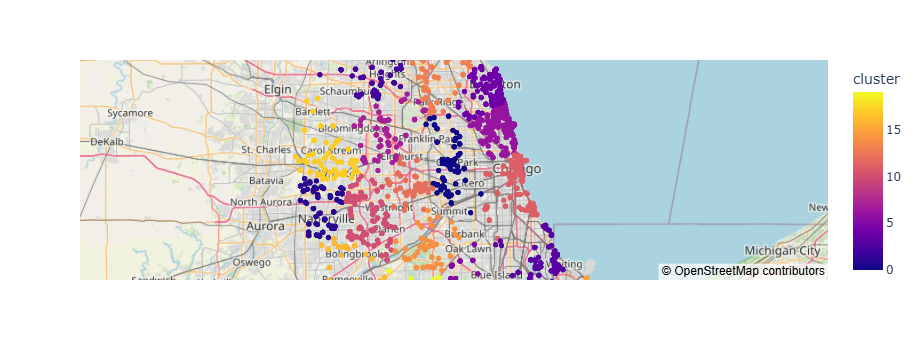

In [151]:
X = data_ch
X = X.sample(n=min(len(X)//10, 10000))
clustering = KMeans(n_clusters=20).fit(X[['lat', 'lng']])

X_aug = helper(X, clustering.labels_)